# New York Electricity Production

Some practice creating an animated line graph showing New York energy production from 1960 to 2016. Find data [here](https://catalog.data.gov/dataset/electric-generation-by-fuel-type-gwh-beginning-1960).

In [6]:
%matplotlib inline

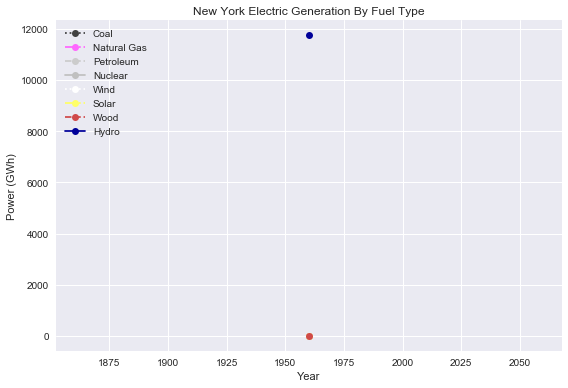

In [7]:
import csv, os
import pandas as pd
from itertools import cycle
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

data = pd.read_csv(os.path.normpath(f'{os.getcwd()}/Data/NYEnergy.csv'))
data = data.fillna(0)
data = data.reindex(index=data.index[::-1])
years = data['Year']
# Combine data for Pumped-Storage and Conventional Hydroelectric Power
hydro = [c + PS for c, PS in zip(data['Conv. Hydro'], data['PS Hydro'])]
hydro = pd.DataFrame({'Hydro': hydro})['Hydro']

# Energy Sources Dictionary
energy_sources = {
    'Coal': {'data': cycle(data['Coal']), 'color': '#404040'},
    'Natural Gas': {'data': cycle(data['Natural Gas']), 'color': '#ff66ff'},
    'Petroleum': {'data': cycle(data['Petroleum']), 'color': '#cccccc'},
    'Nuclear': {'data': cycle(data['Nuclear']), 'color': '#c0c0c0'},
    'Wind': {'data': cycle(data['Wind']), 'color': '#ffffff'},
    'Solar': {'data': cycle(data['Solar']), 'color': '#ffff66'},
    'Wood': {'data': cycle(data['Wood']), 'color': '#d04949'},
    'Hydro': {'data': cycle(hydro), 'color': '#000099'}
}

# Different styles used for the lines in the graph
line_styles = cycle([':', '-.', '--', '-'])

plt.style.use('seaborn')

x_axis = []
y_axis = [[] for _ in range(len(energy_sources.keys()))]

x_years = cycle(years)

# Plot data on Graph
def animate(i):
    if i % (len(years) - 1) == 0 and i:
        x_axis.clear()
        for i in range(len(y_axis)):
            y_axis[i].clear()
    # Clear Graph
    plt.cla()
    x_axis.append(next(x_years))
    index = 0
    for energy, data in energy_sources.items():
        y_axis[index].append(next(data['data']))
        plt.plot(x_axis, y_axis[index], color=data['color'],
                label=energy, marker='o', linestyle=next(line_styles))
        index += 1

    plt.legend(loc='upper left')
    plt.title('New York Electric Generation By Fuel Type')
    plt.xlabel('Year')
    plt.ylabel('Power (GWh)')
    plt.tight_layout()

# Animate Data
animation = FuncAnimation(plt.gcf(), animate, interval=200, repeat=True)

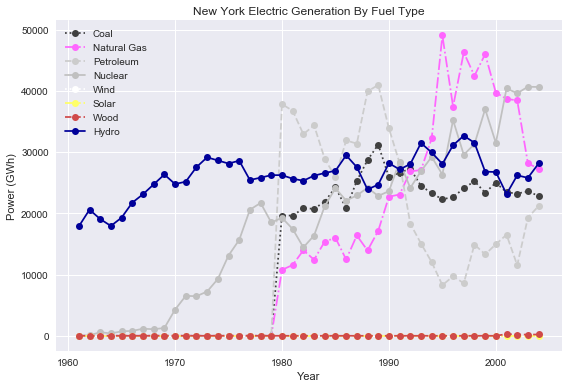

In [9]:
HTML(animation.to_jshtml())